In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Customer_Churn_Data_Large.xlsx", engine='openpyxl')
demographics_df = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name='Customer_Demographics')
churn_df = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name='Churn_Status')

In [3]:
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nFirst 5 rows:\n", df.head())
print("\nSummary statistics:\n", df.describe(include='all'))
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset: (1000, 5)

Column names:
 Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel'], dtype='object')

First 5 rows:
    CustomerID  Age Gender MaritalStatus IncomeLevel
0           1   62      M        Single         Low
1           2   65      M       Married         Low
2           3   18      M        Single         Low
3           4   21      M       Widowed         Low
4           5   21      M      Divorced      Medium

Summary statistics:
          CustomerID          Age Gender MaritalStatus IncomeLevel
count   1000.000000  1000.000000   1000          1000        1000
unique          NaN          NaN      2             4           3
top             NaN          NaN      F       Widowed        High
freq            NaN          NaN    513           276         349
mean     500.500000    43.267000    NaN           NaN         NaN
std      288.819436    15.242311    NaN           NaN         NaN
min        1.000000    18.000000    NaN           NaN    

In [4]:
merged_df = pd.merge(demographics_df, churn_df, on='CustomerID', how='inner')
merged_df.columns, merged_df.head()

(Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel',
        'ChurnStatus'],
       dtype='object'),
    CustomerID  Age Gender MaritalStatus IncomeLevel  ChurnStatus
 0           1   62      M        Single         Low            0
 1           2   65      M       Married         Low            1
 2           3   18      M        Single         Low            0
 3           4   21      M       Widowed         Low            0
 4           5   21      M      Divorced      Medium            0)

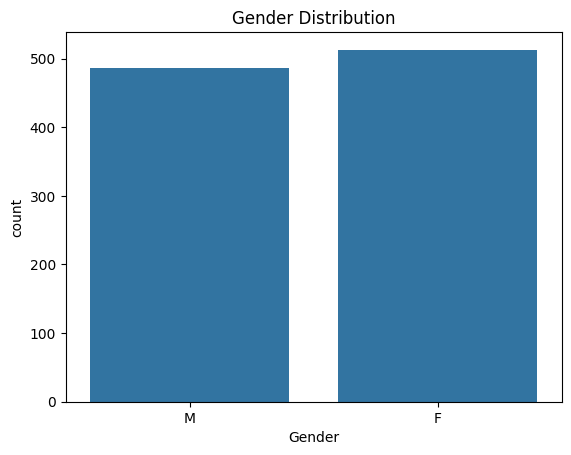

In [5]:
# Gender Distribution
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

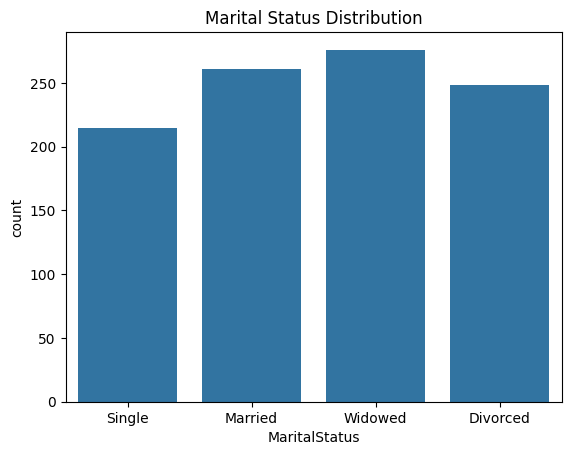

In [6]:
# Marital Status Distribution
sns.countplot(data=df, x='MaritalStatus')
plt.title('Marital Status Distribution')
plt.show()

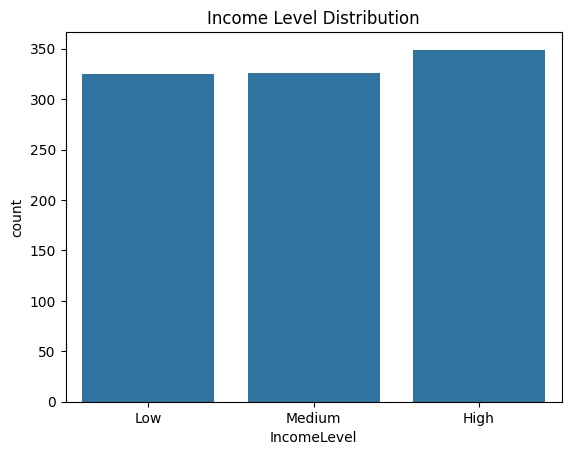

In [7]:
# Income Level Distribution
sns.countplot(data=df, x='IncomeLevel', order=['Low', 'Medium', 'High'])
plt.title('Income Level Distribution')
plt.show()

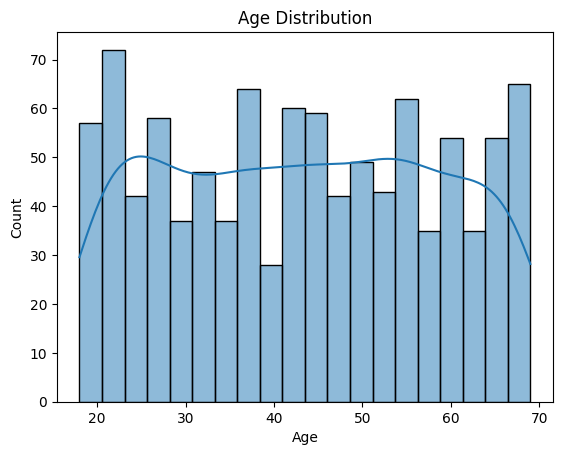

In [8]:
# Age distribution
sns.histplot(data=df, x='Age', kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

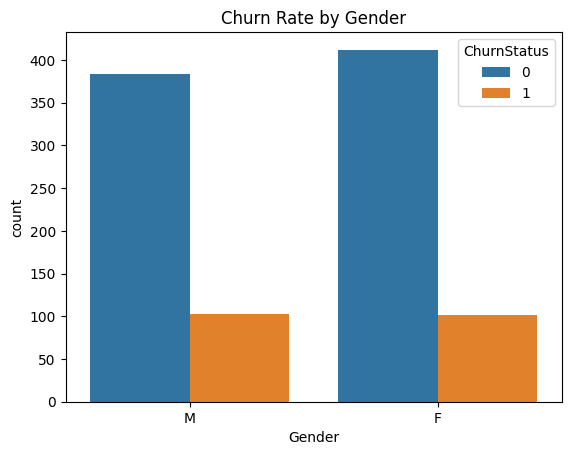

In [9]:
sns.countplot(data=merged_df, x='Gender', hue='ChurnStatus')
plt.title('Churn Rate by Gender')
plt.show()

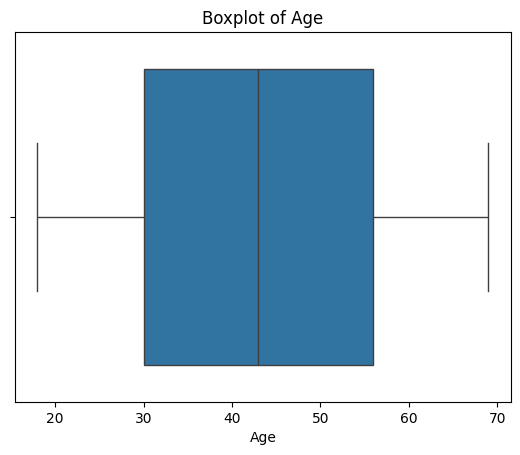

In [10]:
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

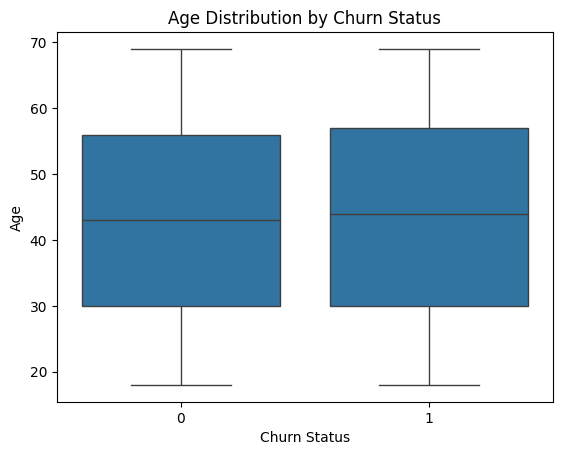

In [11]:
sns.boxplot(x='ChurnStatus', y='Age', data=merged_df)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Age')
plt.show()

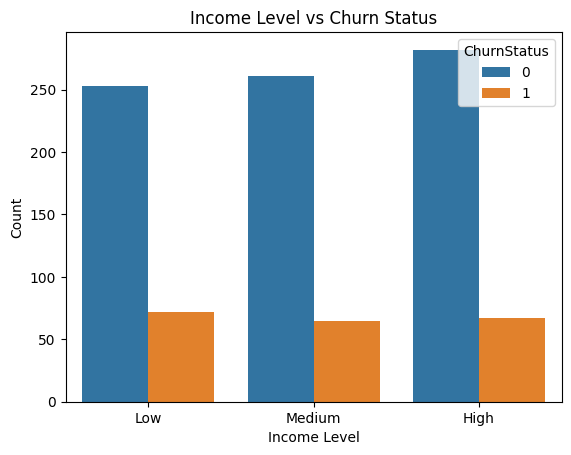

In [12]:
sns.countplot(x='IncomeLevel', hue='ChurnStatus', data=merged_df)
plt.title('Income Level vs Churn Status')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()

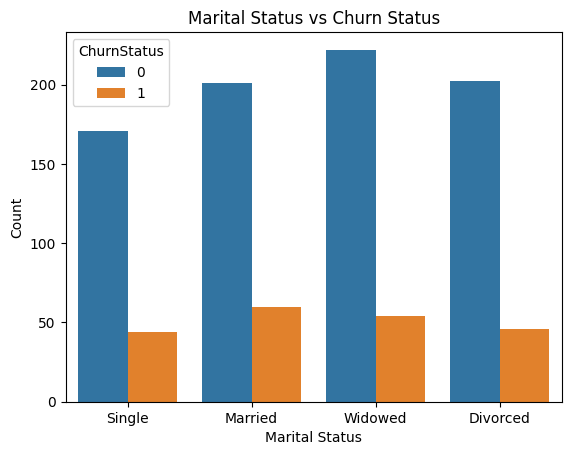

In [13]:
sns.countplot(x='MaritalStatus', hue='ChurnStatus', data=merged_df)
plt.title('Marital Status vs Churn Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [14]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Gender', 'MaritalStatus', 'IncomeLevel'], drop_first=True)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])